<h1 style="text-align:center;">Where Should I Build a Dance Studio in Northern Virginia</h1> 

<h3 style="text-align:center;">Applied Data Science Capstone Project Report</h3>
<h4 style="text-align:center;">IBM Data Science Professional Certificate</h4>
<h5 style="text-align:center;">By Cornelius H Jackson</h5>


<TD style="FONT-SIZE:13px; COLOR:#000000; LINE-HEIGHT:10px; FONT-FAMILY:Arial,Helvetica,sans-serif"></TD>
    
## Introduction

Ten years ago, I started learning Hand Dancing.  I wasn't good at the time and did not even look like I would ever obtain the coordination and rhythm necessary to dance.  But through countless hours of learning and practicing, I have learned that I enjoy dancing and that it brings out a joyous feeling that makes me a better person.  As I want others to experience the same feelings for themselves, I would like to open a dance studio of my own.

Since I live in Northern Virginia, I will study the Northern Virginia area to find out the best place for a new dance studio. I will start by gathering data concerning the Dance Studios within Northern Virginia to determine the best area by zip code to start a Dance Studio. I will gather data regarding the population and median income of each area.

I will obtain data about the cities and counties in Northern Virginia from https://en.wikipedia.org/wiki/Northern_Virginia. Next, I will web scrap https://www.zipcodestogo.com/Virginia/ for the zip codes in each city and county within Northern Virginia. Next, I will write a program to pull the population, median household income, and latitude/longitude for each zip code from https://www.zipdatamaps.com. I will also pull data about dance studios within each zip code using FourSquare.  With all the data I gather, I will use the data to find an area that is close to the median of the dance studio frequency of Northern Virginia, as I would not want to open a studio in an area where competition is the highest.  I will use the relative frequency of the population and median household income to add value to the area for the studio, as more people offer more prospects, and a higher median household income yields more disposable income.


Start by import all the libraries needed to complete the project.

In [1]:
import pandas as pd # library for data analsysis
import requests # library to handle requests

import numpy as np # library to handle data in a vectorized manner

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.lines as lines
from pylab import plot, show, savefig, xlim, figure, ylim, legend, boxplot, setp, axes

import geocoder # import geocoder
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

# import k-means from clustering stage
from sklearn.cluster import KMeans

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

import folium # map rendering library

import foursquare
import secret

# Input Credentails for Foursquare
CLIENT_ID = secret.foursqu_id # your Foursquare ID
CLIENT_SECRET = secret.foursqu_secret # your Foursquare Secret
VERSION = '20200824' # Foursquare API version

I start by placing the data obtained from https://en.wikipedia.org/wiki/Northern_Virginia into a list.

In [2]:
north_va_region_list = ['Alexandria City','Arlington','Clarke','Culpeper','Fairfax','Fairfax City','Falls Church City','Fauquier','Frederick','Fredericksburg City','Loudoun','Madison','Manassas City','Manassas Park City','Prince William','Rappahannock','Spotsylvania','Stafford','Warren','Winchester City']

Import data by web scrapping and check if data was imported properly.

In [3]:
url="https://www.zipcodestogo.com/Virginia/"

#Import data from url
data1 = pd.read_html(url)

#Print header of first table from url
data1[0].head()

,0
0,Zip Codes for the State of Virginia Zip Code...


Data1[0] is not the data I was looking for. Check data1[1] for the dataset.

In [4]:
#Print header of second table from url
data1[1].head()

,0,1,2,3
0,Zip Codes for the State of Virginia,Zip Codes for the State of Virginia,Zip Codes for the State of Virginia,Zip Codes for the State of Virginia
1,Zip Code,City,County,Zip Code Map
2,20101,Dulles,Loudoun,View Map
3,20102,Dulles,Loudoun,View Map
4,20103,Dulles,Loudoun,View Map


Data1[1] is the proper dataset.  Next I will place format the dataframe and use the list to obtain all the area codes within Northern VA.

In [ ]:
# place a copy of the data in a new dataframe
zip_code_df = data1[1].copy()

#Take the values of the second row to be used as column headers
columns_name=list(zip_code_df.values[1])
zip_code_df.columns=columns_name

# Remove the unneed rows and columns for the table
zip_code_df = zip_code_df.drop([0,1])
zip_code_df = zip_code_df.drop(["Zip Code Map"], axis=1)

# Remove rows that are not in the list of Northen Virginia Counties
for index, row in zip_code_df.iterrows():
    if row["County"] not in north_va_region_list:
        zip_code_df = zip_code_df.drop([index])

# Reset the index of the rows
zip_code_df = zip_code_df.reset_index(drop=True)

#Saves data to a csv file
zip_code_df.to_csv('zip_code_df.csv', index=None)

I gathered the data concerning the Northern Virginia counties I am interested in and place the data in a dataframe. The data was saved and placed in a .csv file. 

In [5]:
# Imports data from a csv file
zip_code_df = pd.read_csv('zip_code_df.csv')

Next, I obtained the population in each area code using https://www.virginia-demographics.com/zip_codes_by_population.
Import data by web scrapping and check if data was imported properly.

In [ ]:
#Code to gather data from a website by calling each webpage one at a time and scrapping the page
#Initialize an empty list
data4=[]

#Loop for looping through each zip code
for x in zip_code_df['Zip Code']:

    # Reading data from website for a specific zip code
    data3=pd.read_html("https://www.zipdatamaps.com/{}".format(x))
    
    # Searching through the scrapped data for specific data
    for y in range(len(data3[0][0])):
        label = data3[0][0][y]
        
        #Obtaining data regarding the current population
        if "Current Population" in label:
            pop = data3[0][1][y]
            
        #Obtaining data regarding the Coordinates
        elif "Coordinates" in label:
            
            #Split the data into it latitude and longitude components 
            lat, lng = data3[0][1][y].split(",")
            
        #Obtaining data regarding the Median Household Income
        elif "Median Household Income" in label:
            income = data3[0][1][y]
    
    #Placing data in the initialized list
    data4.append([x,
                 pop,
                 income,
                 lat,
                 lng])

#Placing all the gathered data into a dataframe
zip_data_maps_info=pd.DataFrame(data4, columns=['Zip Code',
                                                "Population",
                                                'Median Household Income',
                                                "Latitude",
                                                "Longitude"])

#Saving the data to a csv file
zip_data_maps_info.to_csv('zip_data_maps_info.csv', index=None)

This information was also saved to a .csv file, as to not overload the website with requests.

In [6]:
#Loading the datafrom a csv file
zip_data_maps_info = pd.read_csv('zip_data_maps_info.csv')

Next I merged the two dataframes and cleaned up the data.

In [7]:
#Merging the data from the two saved dataframes together
dataset = zip_code_df.merge(zip_data_maps_info, on="Zip Code")

#Droping all rows containing missing values
dataset2=dataset.dropna()

#Change the data types of the columns
dataset2=dataset2.astype({'Population': 'int'})
dataset2=dataset2.astype({'Median Household Income': 'str'})
dataset2=dataset2.astype({'Latitude': 'float'})
dataset2=dataset2.astype({'Longitude': 'float'})

#Removing faulty data
dataset2=dataset2.loc[(dataset2.loc[:,'Population']) != 0]

#Formatting Data to remove "$"
for x, y in dataset2['Median Household Income'].items():
    dataset2['Median Household Income'][x] = y.replace("$", "")

#Removing faulty data and data with missing values
dataset2 = dataset2.loc[(dataset2.loc[:,'Population']) >= 1]
dataset2 = dataset2.loc[(dataset2.loc[:,'Median Household Income']) != '']
dataset2 = dataset2.astype({'Median Household Income': 'int'})

#Printing results
print('The dataframe has {} counties and {} zip codes with a population.'.format(
        len(dataset2['County'].unique()),dataset2.shape[0]))

The dataframe has 19 counties and 166 zip codes with a population.


C:\Users\corne\anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Next I mapped the data I gathered, just to get a visual representation of the data. In doing so, I obtained the mean value of the latitudes and longitudes of the zip codes in the dataframe to center the mapping on.

In [8]:
#Find the mean values of the coordinates
latitude = dataset2['Latitude'].mean()
longitude = dataset2['Longitude'].mean()

# create map of Northern Virginia using latitude and longitude values
map_nova = folium.Map(location=[latitude, longitude], zoom_start=8)

# add markers to map
for lat, lng, county, city in zip(dataset2['Latitude'], dataset2['Longitude'], dataset2['County'], dataset2['City']):
    label = '{}, {}'.format(city, county)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_nova)  
    
map_nova

As Northern Virginia is a large data set, I deccided to work on a smaller region first.  This region being Prince William County.

In [9]:
#Create a subset concerning the Prince William county of the dataframe
pwc_dataset = dataset2.loc[(dataset2.loc[:,'County']) == 'Prince William']

#Find the mean coordinates of the county
latitude = pwc_dataset['Latitude'].mean()
longitude = pwc_dataset['Longitude'].mean()

# create map of Northern Virginia using latitude and longitude values
map_pwc = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, county, city, zc in zip(pwc_dataset['Latitude'],pwc_dataset['Longitude'],pwc_dataset['County'],pwc_dataset['City'],pwc_dataset['Zip Code']):
    label = '{}, {} \n{}'.format(city, county, zc)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_pwc)  
    
map_pwc

To gather the Foursquare data and properly place it within a dataframe, I modified the function provided in class to gather data concerning "Dance Studios".

In [10]:
#Function to use Foursquare API to obtain data
def getNearbyVenues(zip_code, latitudes, longitudes, radius=8047, LIMIT=100): # define radius 8047meters=5miles
    
    venues_list=[]
    for zc, lat, lng in zip(zip_code, latitudes, longitudes):
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT,
            '4bf58dd8d48988d134941735')
            
        # make the GET request
        results = requests.get(url).json()['response']['venues']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            zc, 
            lat, 
            lng, 
            v['categories'][0]['name'], # venue type
            v['name'], # venue name
            v['location']['lat'], # venue latitude
            v['location']['lng']) for v in results]) # venue longitude

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Zip Code', 
                  'Latitude', 
                  'Longitude', 
                  'Venue Category', 
                  'Venue',
                  'Venue Latitude', 
                  'Venue Longitude']
    
    return(nearby_venues)

Using the function above, I gathered data concerning all the dance studios within a 5 mile radius and place the data in a.csv file.

In [ ]:
#Calling the Funtion to gather data about Prince William County from Foursquare 
pwc_venues = getNearbyVenues(zip_code=pwc_dataset['Zip Code'],
                                   latitudes=pwc_dataset['Latitude'],
                                   longitudes=pwc_dataset['Longitude'])

#Save data to a csv file
pwc_venues.to_csv('pwc_venues.csv', index=None)

As data may change from day to day, I am using the data saved from the .csv file.

In [11]:
#Load data from a csv file
pwc_venues = pd.read_csv('pwc_venues.csv')

Next, I cleaned and prepared the data obtained for examination.

In [12]:
#Remove data that is not a Dance Studio from dataframe
pwc_venues = pwc_venues.loc[(pwc_venues.loc[:,'Venue Category']) == "Dance Studio"]

#group the data by Zip Code counting each occurrence 
pwc_venues.groupby('Zip Code').count()

# one hot encoding
pwc_onehot = pd.get_dummies(pwc_venues[['Venue Category']], prefix="", prefix_sep="")

# add Zip Code column back to dataframe
pwc_onehot['Zip Code'] = pwc_venues['Zip Code'] 

# move Zip Code column to the first column
fixed_columns = [pwc_onehot.columns[-1]] + list(pwc_onehot.columns[:-1])
pwc_onehot = pwc_onehot[fixed_columns]

#group the data by Zip Code counting each occurrence 
pwc_grouped = pwc_onehot.groupby('Zip Code').sum().reset_index()
dataset3 = dataset2.reset_index()

#Merging the data frames together
pwc_grouped = pd.merge(right= pwc_grouped, left=dataset3)
pwc_grouped.head()

,index,Zip Code,City,County,Population,Median Household Income,Latitude,Longitude,Dance Studio
0,8,20109,Manassas,Prince William,37265,65099,38.801102,-77.521820,18
1,10,20111,Manassas,Prince William,30590,82990,38.752850,-77.430717,8
2,11,20112,Manassas,Prince William,25833,121456,38.672501,-77.433449,5
3,29,20136,Bristow,Prince William,28498,110302,38.716431,-77.531502,14
4,36,20143,Catharpin,Prince William,1216,106620,38.855350,-77.555450,10


In [13]:
#Organize the dataframe
#Remove extra indexing column
pwc_grouped.drop(columns=['index'], inplace=True)

#Rearrange columns order
cols = pwc_grouped.columns.tolist()
cols=cols[0:3]+cols[5:7]+cols[3:5]+cols[7:]
pwc_grouped=pwc_grouped[cols]

Next, I graphed the data on a scatter plot to see if I could see a correlation between the Dance Studios and the Population and the Median Household Income.

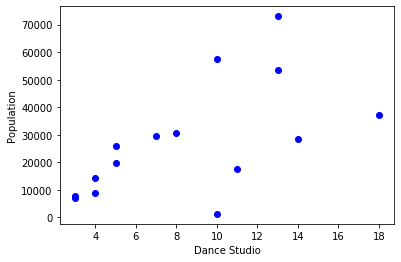

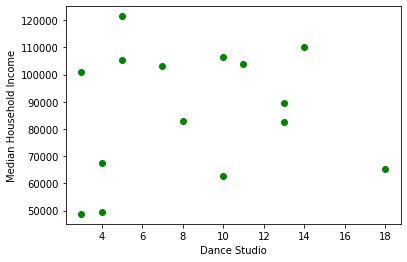

In [14]:
#Scatter plot the data
plt.scatter(pwc_grouped['Dance Studio'], pwc_grouped['Population'],  color='blue')
plt.xlabel("Dance Studio")
plt.ylabel("Population")
plt.show()
plt.scatter(pwc_grouped['Dance Studio'], pwc_grouped['Median Household Income'],  color='g')
plt.xlabel("Dance Studio")
plt.ylabel("Median Household Income")
plt.show()

As I couldn't see any correlation, I decided to find the relative frequency of each variable and plot them on a bar chart to get a better feel for the data.

C:\Users\corne\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\corne\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\corne\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

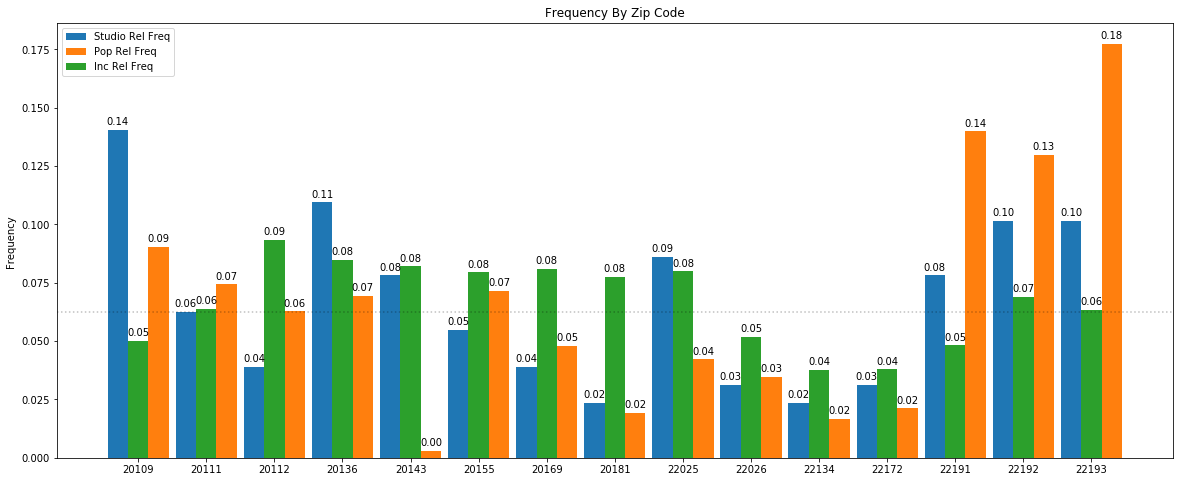

In [15]:
#Create a new dataframe to show the relative frequency a column
pwc_rel_freq=pwc_grouped[['Zip Code','Dance Studio','Population','Median Household Income']]

#Calculate the relative frequency and add it to the dataframe
pwc_rel_freq['Studio Rel Freq'] = pwc_rel_freq['Dance Studio']/pwc_rel_freq['Dance Studio'].sum()
pwc_rel_freq['Pop Rel Freq'] = pwc_rel_freq['Population']/pwc_rel_freq['Population'].sum()
pwc_rel_freq['Inc Rel Freq'] = pwc_rel_freq['Median Household Income']/pwc_rel_freq['Median Household Income'].sum()
pwc_rel_freq['Freq Sum'] = pwc_rel_freq['Studio Rel Freq']+pwc_rel_freq['Pop Rel Freq']+pwc_rel_freq['Inc Rel Freq']

#Sort data by the total sum column
pwc_rel_freq.sort_values(by=['Freq Sum'],ascending=False).reset_index(drop=True)

#Create a Bar Chart of data
#Initializing values to chart
labels = pwc_rel_freq['Zip Code']
studio = pwc_rel_freq['Studio Rel Freq']
popu = pwc_rel_freq['Pop Rel Freq']
incom = pwc_rel_freq['Inc Rel Freq']

x = np.arange(len(labels))  # the label locations
width = 0.30  # the width of the bars

fig, ax = plt.subplots(figsize=(20, 8))
rects1 = ax.bar(x - width, studio, width, label='Studio Rel Freq')
rects2 = ax.bar(x + width, popu, width, label='Pop Rel Freq')
rects3 = ax.bar(x, incom, width, label='Inc Rel Freq')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Frequency ')
ax.set_title('Frequency By Zip Code')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.axhline(pwc_rel_freq['Studio Rel Freq'].median(), c='k', alpha=.25, ls='dotted')

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)


plt.show()

I drew a line representing the median of the Relative Frequency of Dance Studios in the plot above to get a since of what the average set values with a Relative Frequency for Dance Studios being close to that value looks like. Zip Code 20111 seems to show a great representation of balance between all 3 categories.

Next I decided to do the same for all the data points.

In [ ]:
#Repeat the process above for all data

#Initialize dataframe
all_venues=pd.DataFrame()

#Loop to cycle through each County
for county in dataset2.drop_duplicates(subset=['County']):
    loop_dataset = dataset2.loc[(dataset2.loc[:,'County']) == county]
    
    #Calling the Funtion to gather data about the Counties from Foursquare 
    loop_venues = getNearbyVenues(zip_code=dataset2['Zip Code'],
                                   latitudes=dataset2['Latitude'],
                                   longitudes=dataset2['Longitude'])
    
    #Add data for each county to the inialized dataframe
    all_venues = all_venues.append(loop_venues)

#Save data to a csv file
all_venues.to_csv('all_venues.csv', index=None)

Again saving the data to a .csv file to work with constant data and to not overload the Foursquare website.

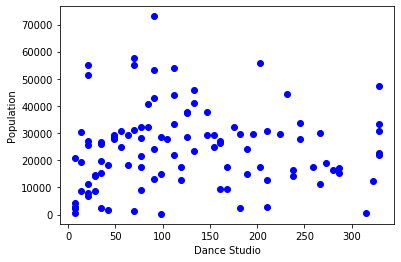

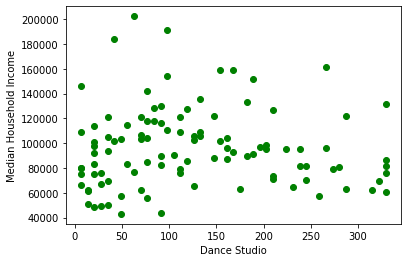

In [16]:
#Load data from a csv file
all_venues = pd.read_csv('all_venues.csv')

#Remove data that is not a Dance Studio from dataframe
all_venues = all_venues.loc[(all_venues.loc[:,'Venue Category']) == "Dance Studio"]

#group the data by Zip Code counting each occurrence
all_venues.groupby('Zip Code').count()

# one hot encoding
all_onehot = pd.get_dummies(all_venues[['Venue Category']], prefix="", prefix_sep="")

# add Zip Code column back to dataframe
all_onehot['Zip Code'] = all_venues['Zip Code'] 

# move Zip Code column to the first column
fixed_columns = [all_onehot.columns[-1]] + list(all_onehot.columns[:-1])
all_onehot = all_onehot[fixed_columns]

#Merging the data frames together
all_grouped = all_onehot.groupby('Zip Code').sum().reset_index()
dataset3 = dataset2.reset_index()
all_grouped = pd.merge(right= all_grouped, left=dataset3)

#Rearrange columns order
cols = all_grouped.columns.tolist()
cols=cols[0:3]+cols[5:7]+cols[3:5]+cols[7:]
all_grouped=all_grouped[cols]

#Scatter plot the data
plt.scatter(all_grouped['Dance Studio'], all_grouped['Population'],  color='blue')
plt.xlabel("Dance Studio")
plt.ylabel("Population")
plt.show()
plt.scatter(all_grouped['Dance Studio'], all_grouped['Median Household Income'],  color='g')
plt.xlabel("Dance Studio")
plt.ylabel("Median Household Income")
plt.show()

Again, I can't see any correlation, I decided to find the relative frequency of each variable and plot the top 10 on a bar chart to get a better feel for the data.

C:\Users\corne\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\corne\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\corne\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

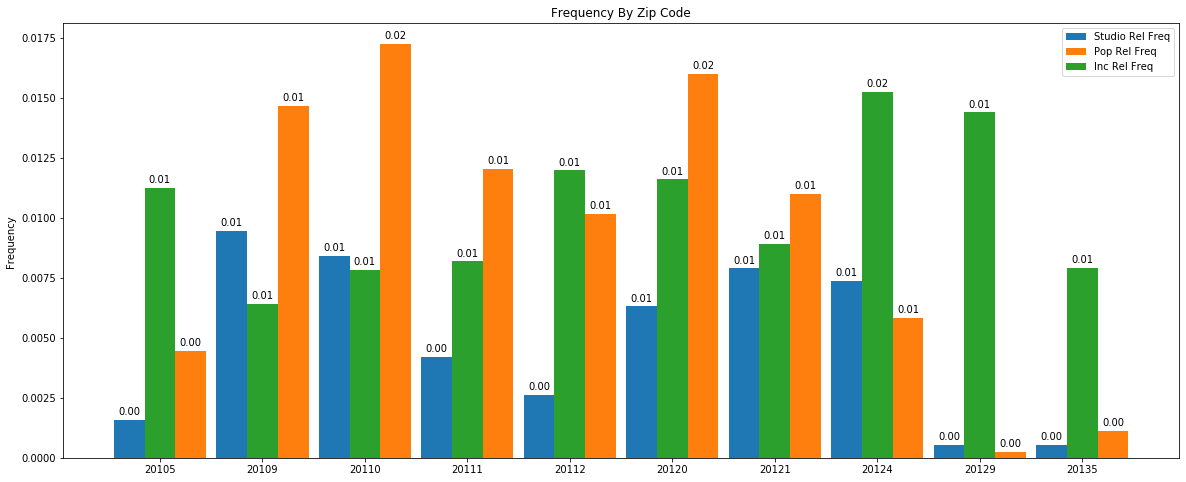

In [17]:
#Create a new dataframe to show the relative frequency a column
all_rel_freq=all_grouped[['Zip Code','Dance Studio','Population','Median Household Income']]

#Calculate the relative frequency and add it to the dataframe
all_rel_freq['Studio Rel Freq'] = all_rel_freq['Dance Studio']/all_rel_freq['Dance Studio'].sum()
all_rel_freq['Pop Rel Freq'] = all_rel_freq['Population']/all_rel_freq['Population'].sum()
all_rel_freq['Inc Rel Freq'] = all_rel_freq['Median Household Income']/all_rel_freq['Median Household Income'].sum()
all_rel_freq['Freq Sum'] = all_rel_freq['Studio Rel Freq']+all_rel_freq['Pop Rel Freq']+all_rel_freq['Inc Rel Freq']

#Sort data by the total sum column
all_rel_freq.sort_values(by=['Freq Sum'],ascending=False).reset_index(drop=True)

#Create a Bar Chart of data
#Initializing values to chart
labels = all_rel_freq['Zip Code'].head(10)
studio = all_rel_freq['Studio Rel Freq'].head(10)
popu = all_rel_freq['Pop Rel Freq'].head(10)
incom = all_rel_freq['Inc Rel Freq'].head(10)

x = np.arange(len(labels))  # the label locations
width = 0.30  # the width of the bars

fig, ax = plt.subplots(figsize=(20, 8))
rects1 = ax.bar(x - width, studio, width, label='Studio Rel Freq')
rects2 = ax.bar(x + width, popu, width, label='Pop Rel Freq')
rects3 = ax.bar(x, incom, width, label='Inc Rel Freq')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Frequency ')
ax.set_title('Frequency By Zip Code')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.show()

I used k-means clustering to cluster the zip codes to see if it would cluster the data as stated above.

In [18]:
# set number of clusters
kclusters = 5

#Create new dataframe to be plotted
all_grouped_clustering = all_rel_freq[['Studio Rel Freq','Pop Rel Freq','Inc Rel Freq']]

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(all_grouped_clustering)

def return_most_common_freq(row, num_top_freq):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_freq]

num_top_freq=3
indicators = ['st', 'nd', 'rd']
columns = ['Zip Code']
for ind in np.arange(num_top_freq):
    columns.append('{}{} Most Common Freq'.format(ind+1, indicators[ind]))

# create a new dataframe
zipcode_venues_sorted = pd.DataFrame(columns=columns)
zipcode_venues_sorted['Zip Code'] = all_rel_freq['Zip Code']

for ind in np.arange(all_rel_freq.shape[0]):
    zipcode_venues_sorted.iloc[ind, 1:] = return_most_common_freq(all_rel_freq.iloc[ind, 3:7], num_top_freq)

# add clustering labels
zipcode_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

#Merging the data frames together
final_merged = dataset2
final_merged = final_merged.join(zipcode_venues_sorted.set_index('Zip Code'), on='Zip Code')

#Find the mean values of the coordinates
latitude = final_merged['Latitude'].mean()
longitude = final_merged['Longitude'].mean()

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
final_merged['Cluster Labels']=final_merged['Cluster Labels'].fillna(-1)
final_merged=final_merged.astype({'Cluster Labels': 'int'})

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(final_merged['Latitude'], final_merged['Longitude'], final_merged['Zip Code'], final_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1] if cluster != -1 else 'k',
        fill=True,
        fill_color=rainbow[cluster-1] if cluster != -1 else 'k',
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Cluster 3
5th Place for a new Dance Studio

In [19]:
final_merged.loc[final_merged['Cluster Labels'] == 3, final_merged.columns[[0,2,8,9,10]]]

,Zip Code,County,1st Most Common Freq,2nd Most Common Freq,3rd Most Common Freq
90,22031,Fairfax,Studio Rel Freq,Pop Rel Freq,Inc Rel Freq
100,22041,Fairfax,Studio Rel Freq,Pop Rel Freq,Inc Rel Freq
101,22042,Fairfax,Studio Rel Freq,Pop Rel Freq,Inc Rel Freq
102,22043,Fairfax,Studio Rel Freq,Pop Rel Freq,Inc Rel Freq
103,22044,Fairfax,Studio Rel Freq,Inc Rel Freq,Pop Rel Freq
104,22046,Falls Church City,Studio Rel Freq,Inc Rel Freq,Pop Rel Freq
116,22101,Fairfax,Studio Rel Freq,Inc Rel Freq,Pop Rel Freq
134,22151,Fairfax,Studio Rel Freq,Inc Rel Freq,Pop Rel Freq
155,22201,Arlington,Studio Rel Freq,Pop Rel Freq,Inc Rel Freq
156,22202,Arlington,Studio Rel Freq,Pop Rel Freq,Inc Rel Freq


This cluster is flooded with studios, which will make it hard to gather customers and maintain customers. 
## Cluster 0
4th Place for a new Dance Studio

In [20]:
#print data of specific cluster value
final_merged.loc[final_merged['Cluster Labels'] == 0, final_merged.columns[[0,2,8,9,10]]]

,Zip Code,County,1st Most Common Freq,2nd Most Common Freq,3rd Most Common Freq
21,20124,Fairfax,Inc Rel Freq,Studio Rel Freq,Pop Rel Freq
53,20166,Loudoun,Studio Rel Freq,Inc Rel Freq,Pop Rel Freq
77,20194,Fairfax,Inc Rel Freq,Studio Rel Freq,Pop Rel Freq
88,22027,Fairfax,Studio Rel Freq,Inc Rel Freq,Pop Rel Freq
98,22039,Fairfax,Inc Rel Freq,Pop Rel Freq,Studio Rel Freq
107,22066,Fairfax,Inc Rel Freq,Pop Rel Freq,Studio Rel Freq
108,22067,Fairfax,Inc Rel Freq,Studio Rel Freq,Pop Rel Freq
129,22124,Fairfax,Inc Rel Freq,Studio Rel Freq,Pop Rel Freq
144,22181,Fairfax,Inc Rel Freq,Studio Rel Freq,Pop Rel Freq
145,22182,Fairfax,Inc Rel Freq,Studio Rel Freq,Pop Rel Freq


I would be hard-pressed to start a studio in this cluster as the relative frequency of the population is so low. Although this is an area where you should find quality over quantity. As I am just starting the business, I want as many opportunities (therefore customers) I can get.
## Cluster 2
3rd Place for a new Dance Studio

In [21]:
#print data of specific cluster value
final_merged.loc[final_merged['Cluster Labels'] == 2, final_merged.columns[[0,2,8,9,10]]]

,Zip Code,County,1st Most Common Freq,2nd Most Common Freq,3rd Most Common Freq
8,20109,Prince William,Pop Rel Freq,Studio Rel Freq,Inc Rel Freq
10,20111,Prince William,Pop Rel Freq,Inc Rel Freq,Studio Rel Freq
11,20112,Prince William,Inc Rel Freq,Pop Rel Freq,Studio Rel Freq
19,20121,Fairfax,Pop Rel Freq,Inc Rel Freq,Studio Rel Freq
29,20136,Prince William,Pop Rel Freq,Inc Rel Freq,Studio Rel Freq
40,20148,Loudoun,Inc Rel Freq,Pop Rel Freq,Studio Rel Freq
42,20151,Fairfax,Inc Rel Freq,Pop Rel Freq,Studio Rel Freq
43,20152,Loudoun,Inc Rel Freq,Pop Rel Freq,Studio Rel Freq
45,20155,Prince William,Pop Rel Freq,Inc Rel Freq,Studio Rel Freq
51,20164,Loudoun,Pop Rel Freq,Studio Rel Freq,Inc Rel Freq


This is a far looking cluster, but when observing it on the map, it looks quite crowded.
## Cluster 4
2nd Place for a new Dance Studio

In [22]:
#print data of specific cluster value
final_merged.loc[final_merged['Cluster Labels'] == 4, final_merged.columns[[0,2,8,9,10]]]

,Zip Code,County,1st Most Common Freq,2nd Most Common Freq,3rd Most Common Freq
4,20105,Loudoun,Inc Rel Freq,Pop Rel Freq,Studio Rel Freq
23,20129,Loudoun,Inc Rel Freq,Studio Rel Freq,Pop Rel Freq
28,20135,Clarke,Inc Rel Freq,Pop Rel Freq,Studio Rel Freq
30,20137,Fauquier,Inc Rel Freq,Studio Rel Freq,Pop Rel Freq
36,20143,Prince William,Inc Rel Freq,Studio Rel Freq,Pop Rel Freq
47,20158,Loudoun,Inc Rel Freq,Pop Rel Freq,Studio Rel Freq
56,20169,Prince William,Inc Rel Freq,Pop Rel Freq,Studio Rel Freq
65,20181,Prince William,Inc Rel Freq,Pop Rel Freq,Studio Rel Freq
69,20186,Fauquier,Inc Rel Freq,Pop Rel Freq,Studio Rel Freq
70,20187,Fauquier,Inc Rel Freq,Pop Rel Freq,Studio Rel Freq


This is a nice cluster to start a new dance studio, as the third most common frequency is the Dance Studio, but the population is the second most common, leading to a smaller pool of people to find to be patrons.
## Cluster 1
1st Place for a new Dance Studio

In [23]:
#print data of specific cluster value
final_merged.loc[final_merged['Cluster Labels'] == 1, final_merged.columns[[0,2,8,9,10]]]

,Zip Code,County,1st Most Common Freq,2nd Most Common Freq,3rd Most Common Freq
9,20110,Manassas City,Pop Rel Freq,Studio Rel Freq,Inc Rel Freq
18,20120,Fairfax,Pop Rel Freq,Inc Rel Freq,Studio Rel Freq
39,20147,Loudoun,Pop Rel Freq,Inc Rel Freq,Studio Rel Freq
57,20170,Fairfax,Pop Rel Freq,Inc Rel Freq,Studio Rel Freq
58,20171,Fairfax,Pop Rel Freq,Inc Rel Freq,Studio Rel Freq
83,22003,Fairfax,Pop Rel Freq,Studio Rel Freq,Inc Rel Freq
85,22015,Fairfax,Pop Rel Freq,Inc Rel Freq,Studio Rel Freq
89,22030,Fairfax City,Pop Rel Freq,Inc Rel Freq,Studio Rel Freq
149,22191,Prince William,Pop Rel Freq,Inc Rel Freq,Studio Rel Freq
150,22192,Prince William,Pop Rel Freq,Inc Rel Freq,Studio Rel Freq


This cluster is top on the list as there is a high population, yielding ample people to service without having to worry about the competitors.  With the median household income being high, the customers should have enough disposable income to pay for the classes without any problems.